In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import transitFinderFunctions as courseworkb
import importlib


# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'transitFinderFunctions' from '/home/olivermcevoy/AstroCourseworkB/transitFinderFunctions.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe_not_nice, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)

file_path = 'CourseworkData/Objectlc'
kepler_dataframe = courseworkb.loadDataFromFitsFiles(file_path,'medfilt')


4375 4375 4375ght curve segment 62 of 62
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780


In [3]:
cursed_list = []
for _ in range(500):
    temp_list = []
    for _ in range(1):
        kepler_dataframe_tmp = courseworkb.loadDataFromFitsFiles(file_path, filter_type='savgol', randomise=True)
        temp_list.append(kepler_dataframe_tmp)
        #cursed_list.append(average_df)
    
    # Calculate the average of the 40 dataframes
    #average_df = pd.concat(temp_list).groupby(level=0).mean()

cursed_list = temp_list

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 

In [4]:
print(len(kepler_dataframe['flux']))
print(len(kepler_dataframe_not_nice['flux']))

64230
1899237


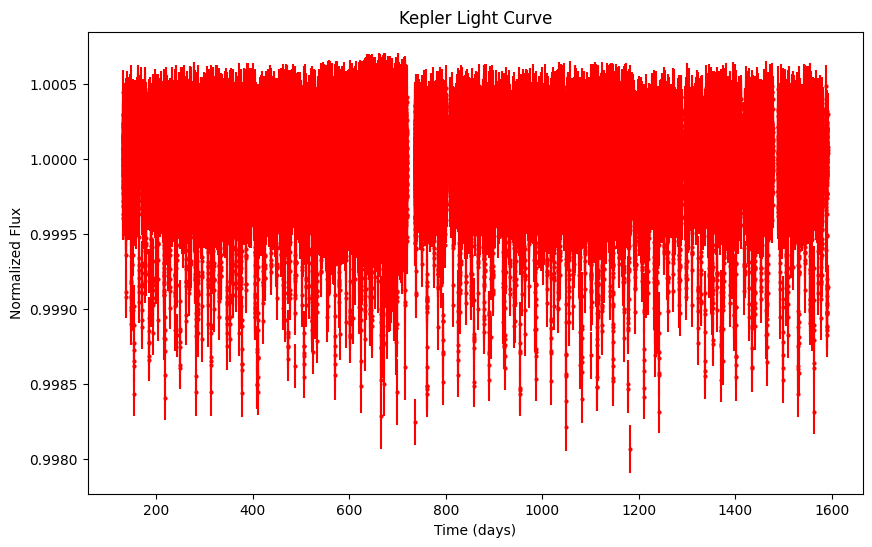

In [5]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


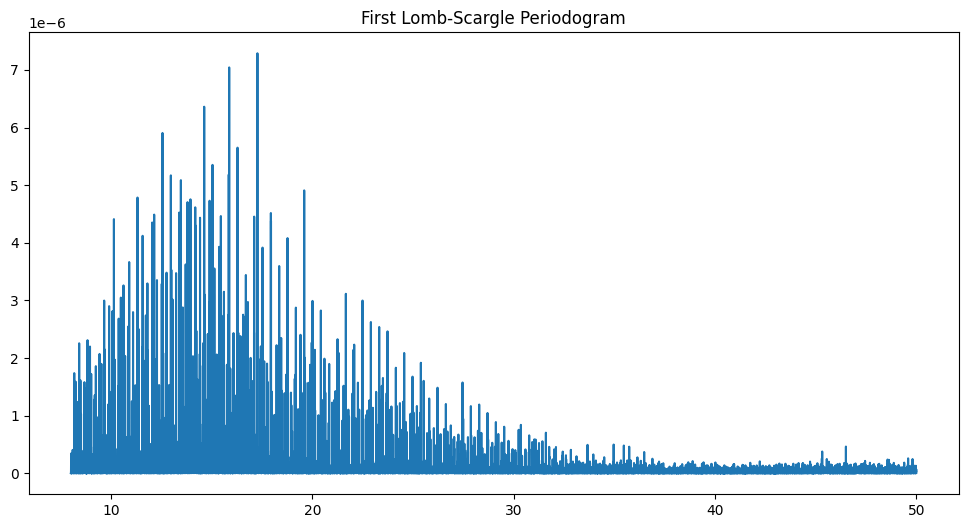

computing second periodogram
Gradient Threshold: 2.09e-13, Second Derivative Threshold: 3.27e-10


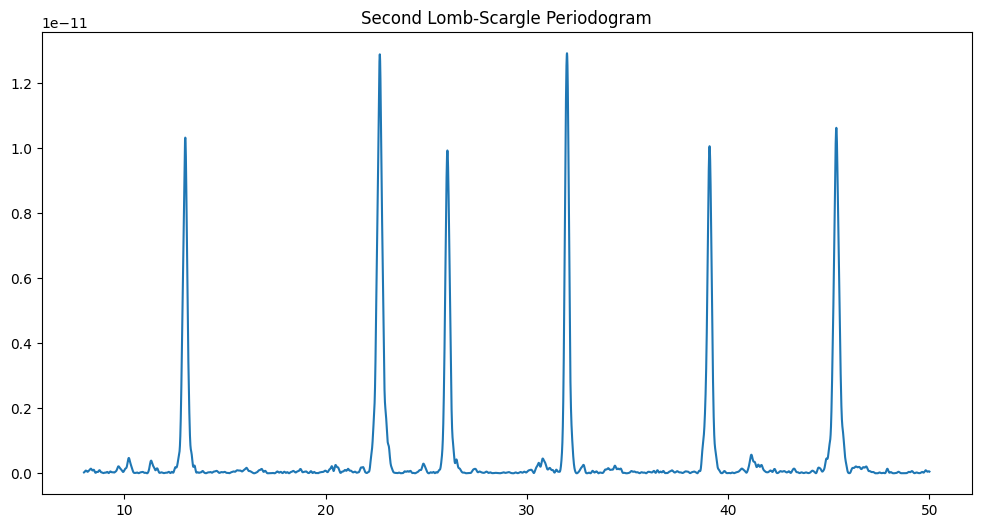

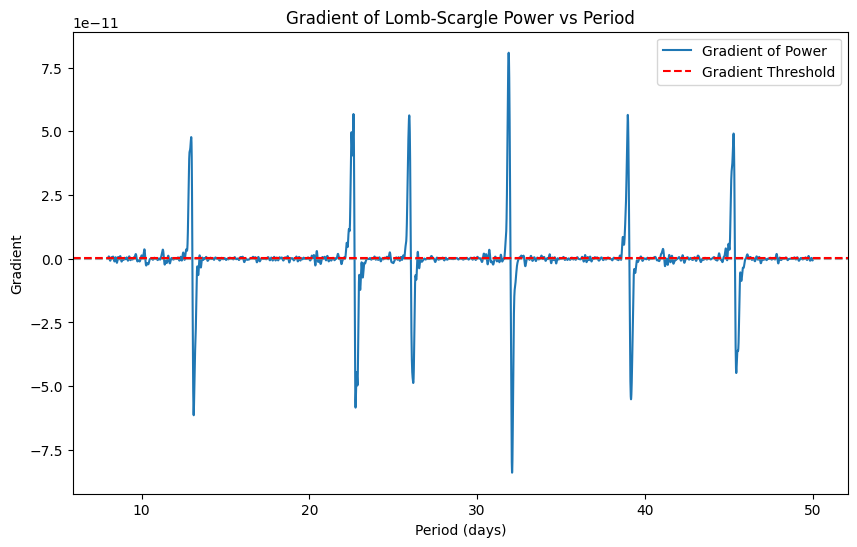

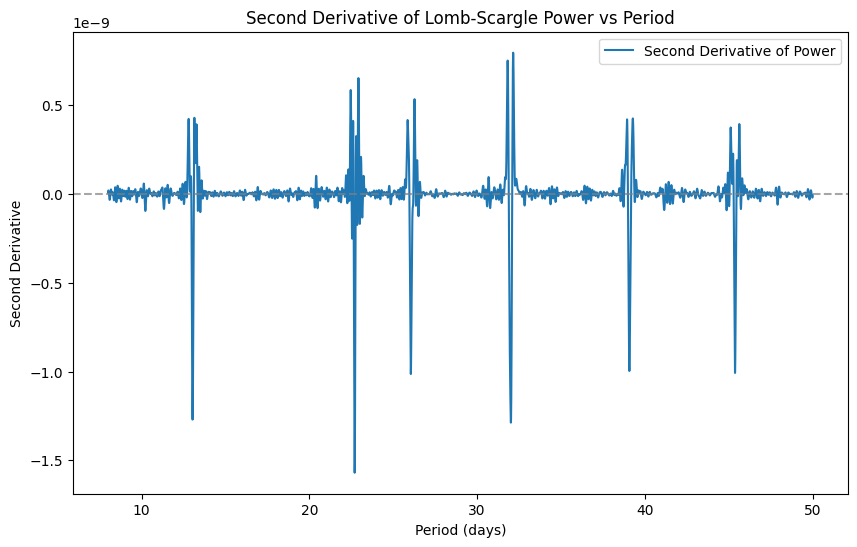

Excluding peaks before period = 8.09 days
Lomb-Scargle Periodogram analysis done


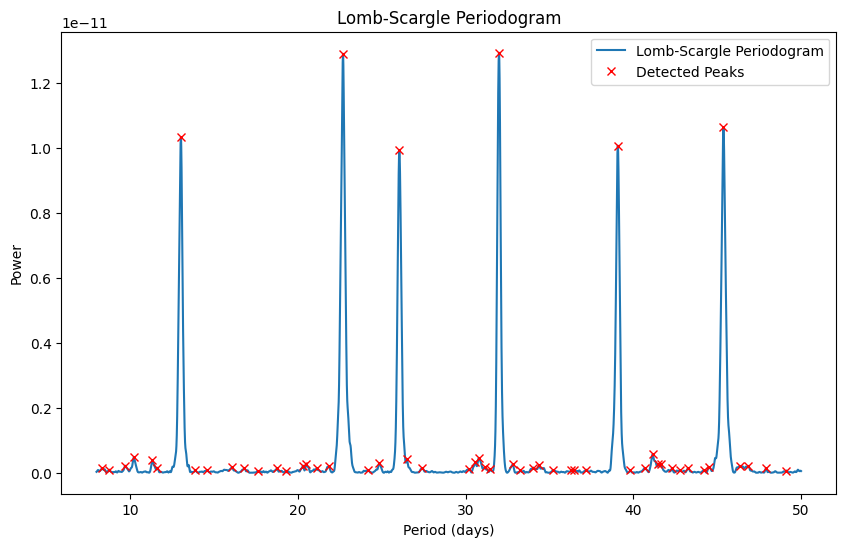

In [6]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (8 ,50)
#peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=50000, period_range=period_range_regular)


# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

Running Lomb-Scargle Periodogram Analysis...
List of random light curves present, computing random light curves


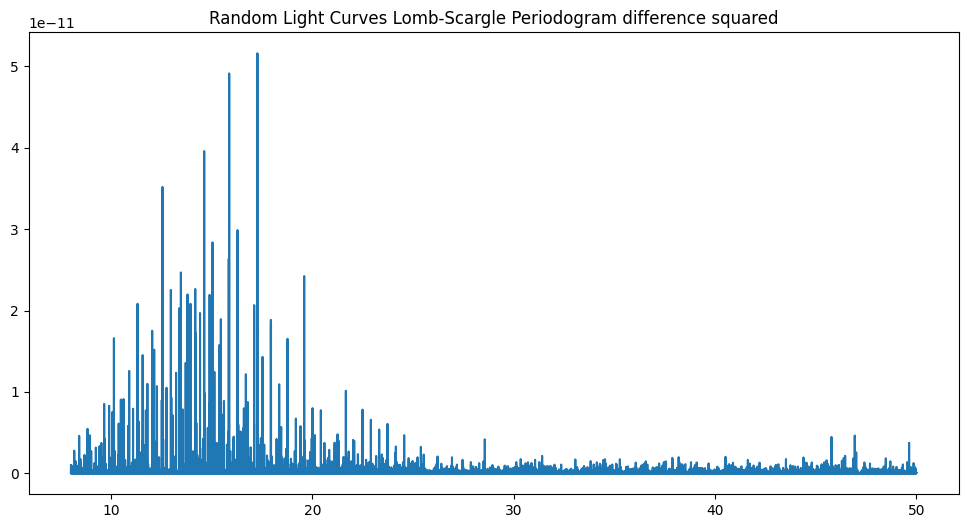

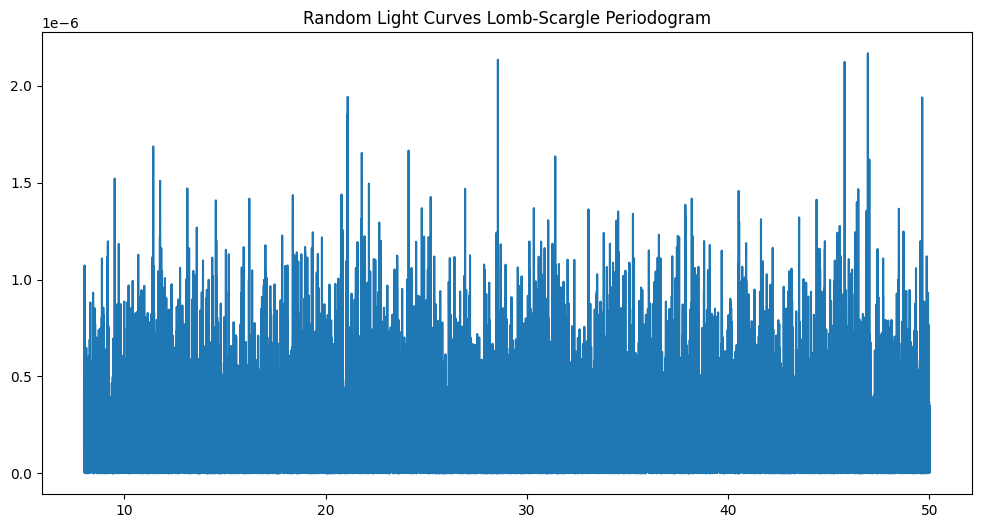

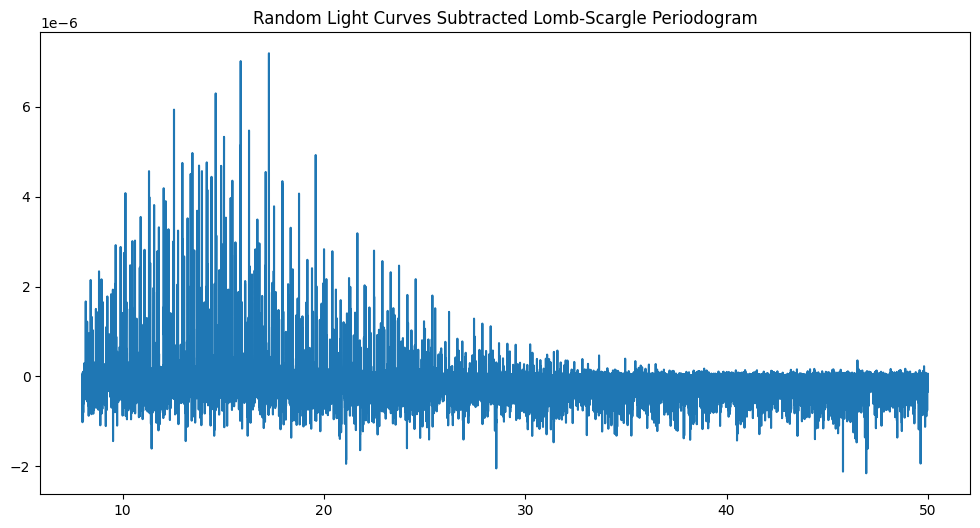

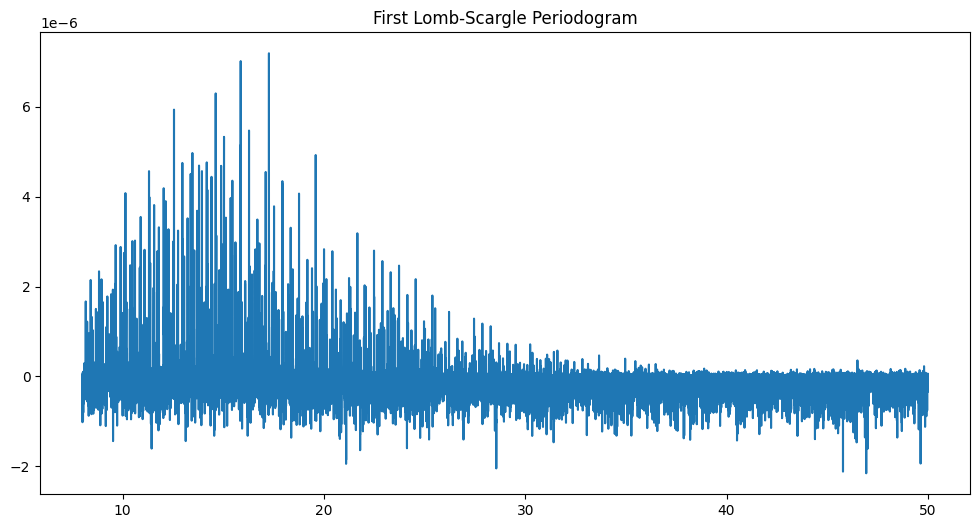

computing second periodogram
computing second periodogram for difference squared


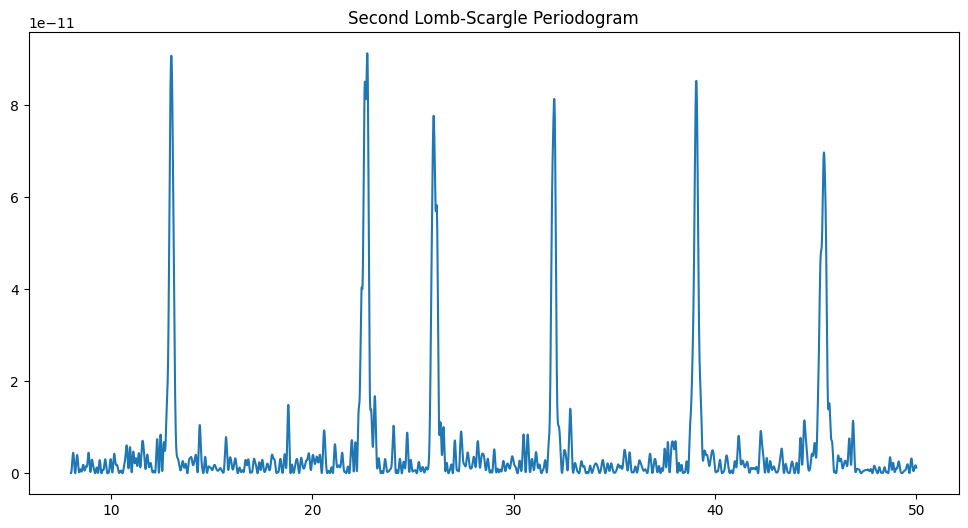

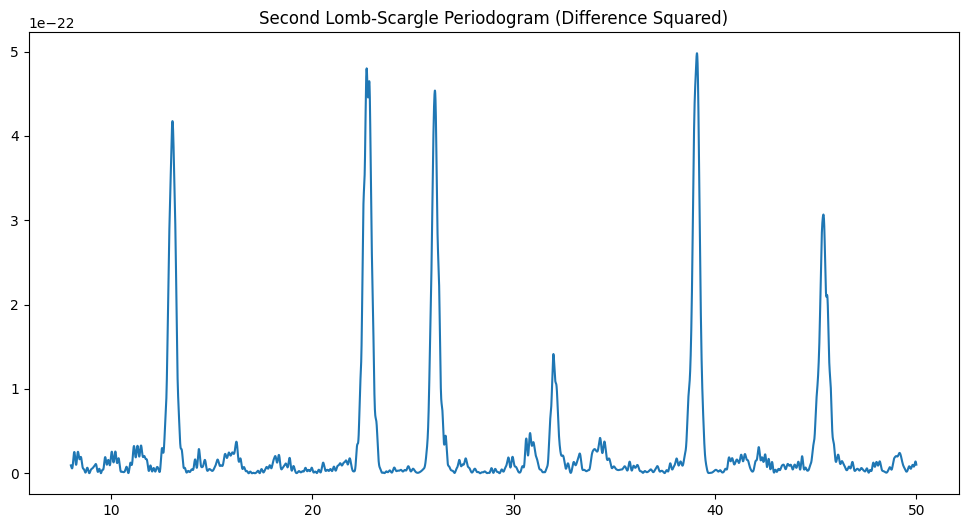

Gradient Threshold: 4.75e-12, Second Derivative Threshold: 4.68e-09


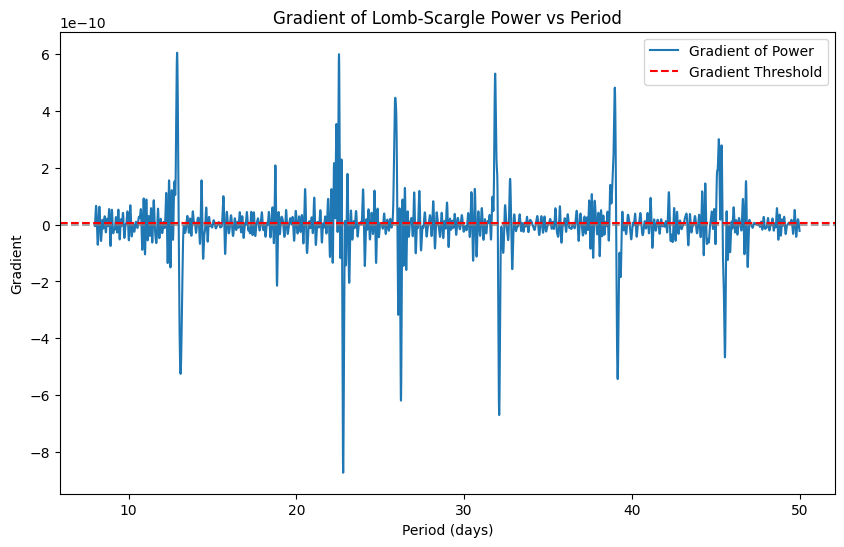

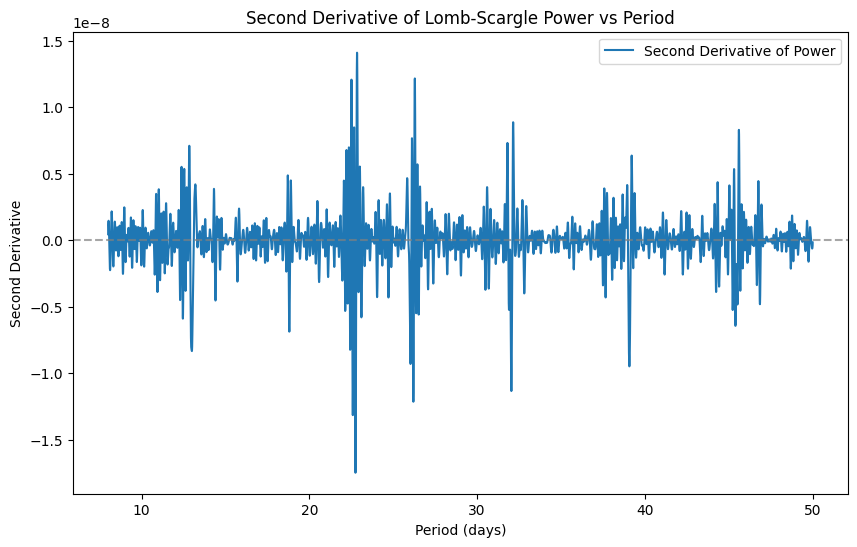

Excluding peaks before period = 8.00 days
Lomb-Scargle Periodogram analysis done


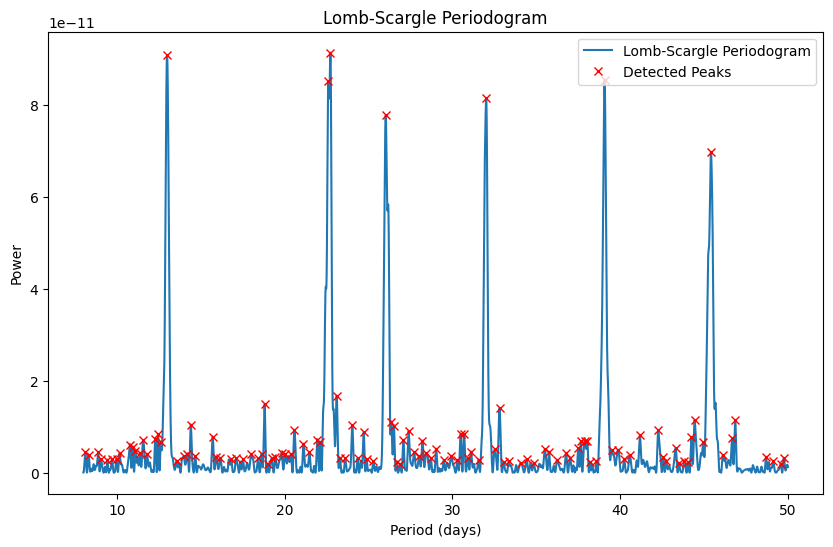

In [7]:
peaks_of_lightcurve_different = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=400000, period_range=period_range_regular, list_of_random_lightcurves=cursed_list, different=True)


In [8]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))




results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      10000
)





54
Adding period 8.342 days to the unique results.
Adding period 8.769 days to the unique results.
Adding period 9.713 days to the unique results.
Adding period 10.225 days to the unique results.
Adding period 11.334 days to the unique results.
Adding period 13.030 days to the unique results.
Adding period 13.894 days to the unique results.
Adding period 16.068 days to the unique results.
Adding period 17.603 days to the unique results.
Adding period 18.753 days to the unique results.
Adding period 20.310 days to the unique results.
Adding period 21.856 days to the unique results.
Adding period 24.212 days to the unique results.
Adding period 26.053 days to the unique results.
Adding period 27.428 days to the unique results.
Adding period 30.208 days to the unique results.
Adding period 31.993 days to the unique results.
Adding period 34.040 days to the unique results.
Adding period 36.309 days to the unique results.
Adding period 39.076 days to the unique results.
Adding period 41.153

In [9]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.1, 0.1)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 24
Adding period 7.562 days to the unique results.
Adding period 10.665 days to the unique results.
Adding period 13.025 days to the unique results.
Adding period 15.998 days to the unique results.
Adding period 19.537 days to the unique results.
Adding period 22.687 days to the unique results.
Adding period 26.050 days to the unique results.
Adding period 31.995 days to the unique results.
Adding period 39.075 days to the unique results.
Adding period 45.374 days to the unique results.
Adding period 7.562 days to the final results.
Adding period 13.025 days to the final results.
Adding period 15.998 days to the final results.
Adding period 19.537 days to the final results.
Number of peaks found after removing duplicates: 4


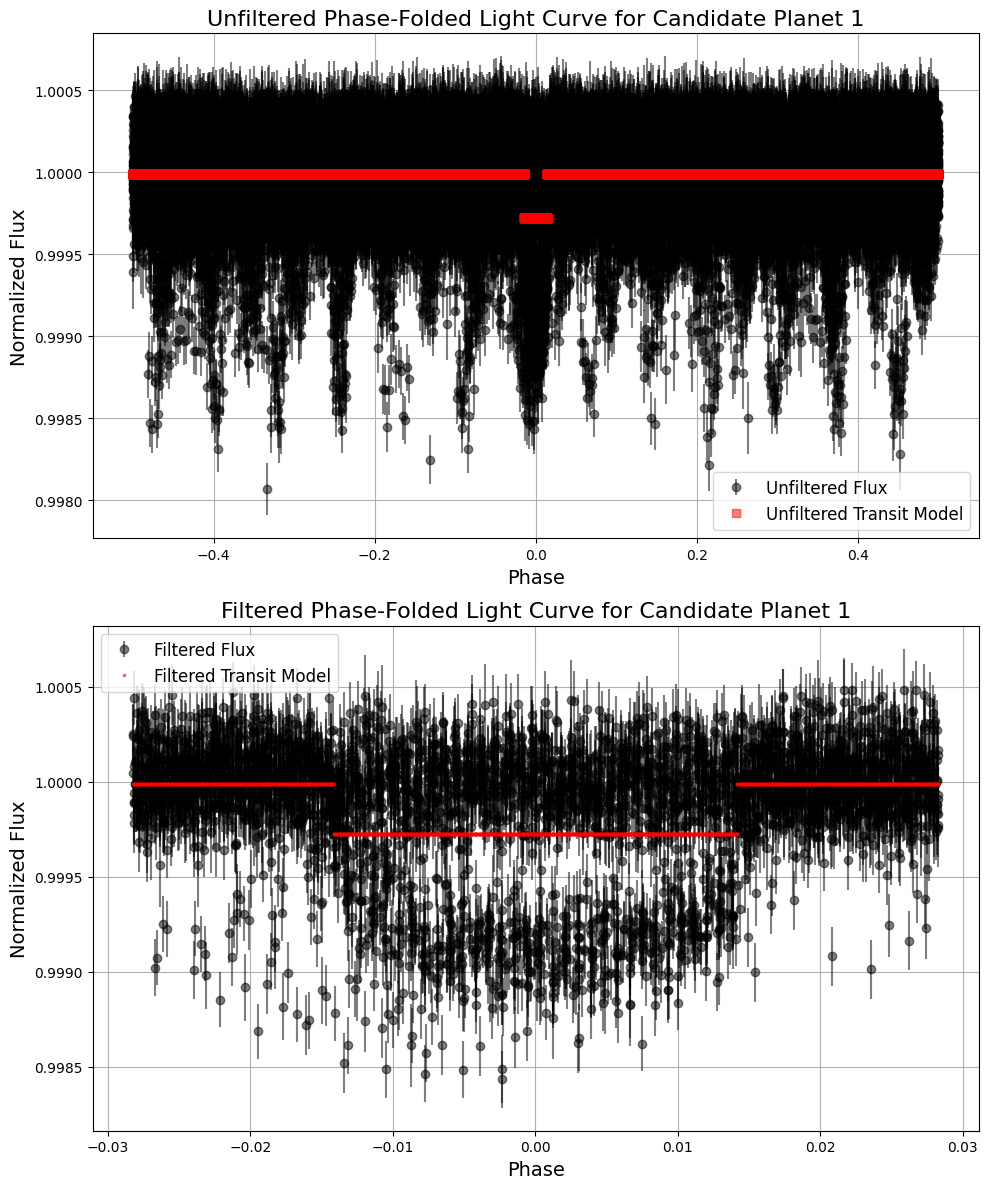

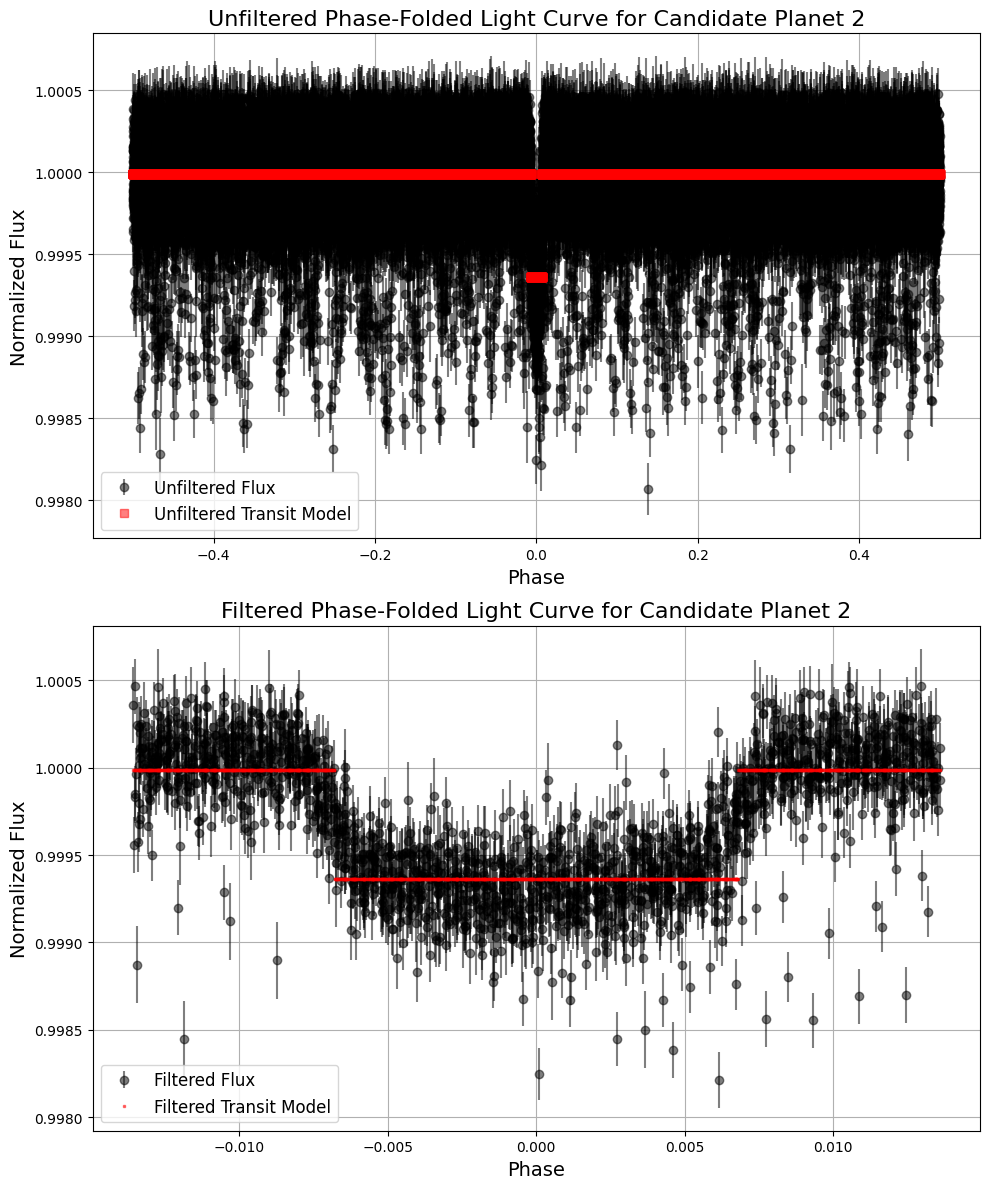

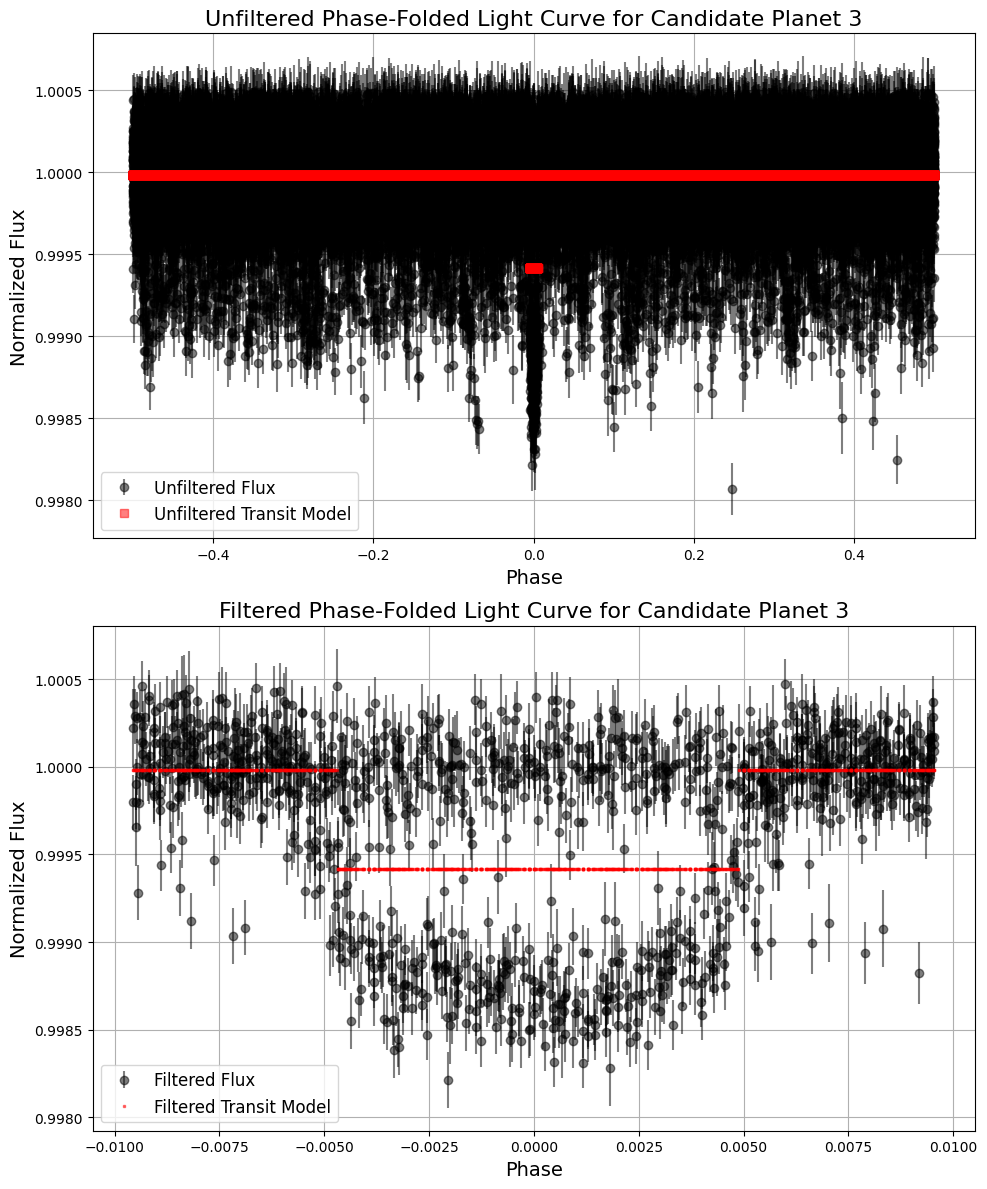

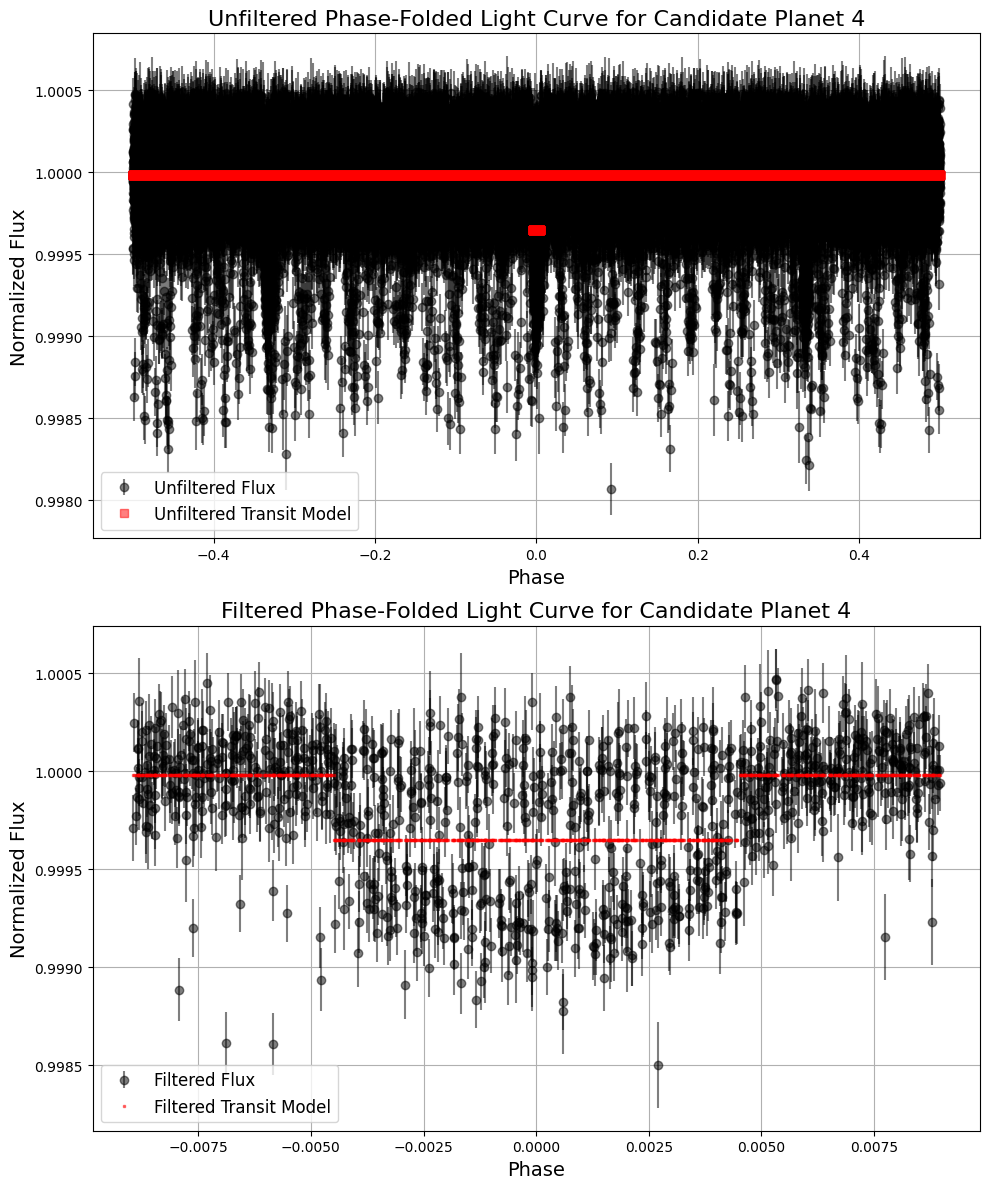

In [10]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [11]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 8.34 days
  Refined Period = 7.56 days
  Transit Depth  = 2.63e-04
  Transit Duration = 0.21 days
  Power = 2618.66
----------------------------------------
Best Transit Candidate: Period = 7.56 days, Depth = 2.63e-04
Estimated Planet Radius: 0.017 Solar Radii
Estimated Planet Radius: 1.852 Earth Radii
Estimated Planet Radius: 0.169 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 13.03 days
  Refined Period = 13.02 days
  Transit Depth  = 6.27e-04
  Transit Duration = 0.18 days
  Power = 7061.73
----------------------------------------
Best Transit Candidate: Period = 13.02 days, Depth = 6.27e-04
Estimated Planet Radius: 0.026 Solar Radii
Estimated Planet Radius: 2.857 Earth Radii
Estimated Planet Radius

Adding period 8.114 days to the unique results.
Adding period 8.879 days to the unique results.
Adding period 9.431 days to the unique results.
Adding period 9.975 days to the unique results.
Adding period 10.770 days to the unique results.
Adding period 11.375 days to the unique results.
Adding period 12.288 days to the unique results.
Adding period 12.990 days to the unique results.
Adding period 13.970 days to the unique results.
Adding period 14.674 days to the unique results.
Adding period 15.707 days to the unique results.
Adding period 16.813 days to the unique results.
Adding period 17.999 days to the unique results.
Adding period 18.981 days to the unique results.
Adding period 20.028 days to the unique results.
Adding period 21.119 days to the unique results.
Adding period 22.607 days to the unique results.
Adding period 24.031 days to the unique results.
Adding period 25.286 days to the unique results.
Adding period 26.671 days to the unique results.
Adding period 28.016 day

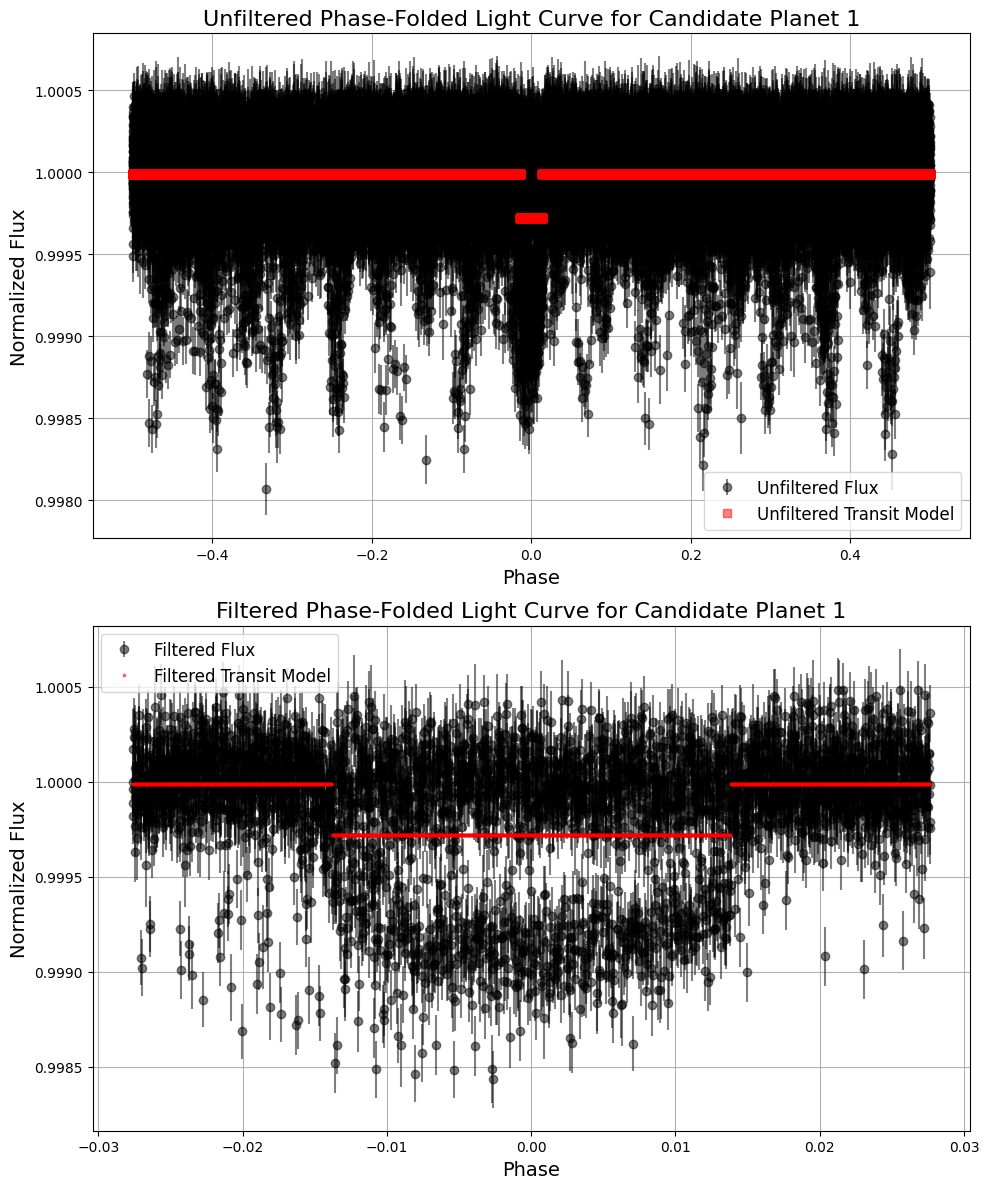

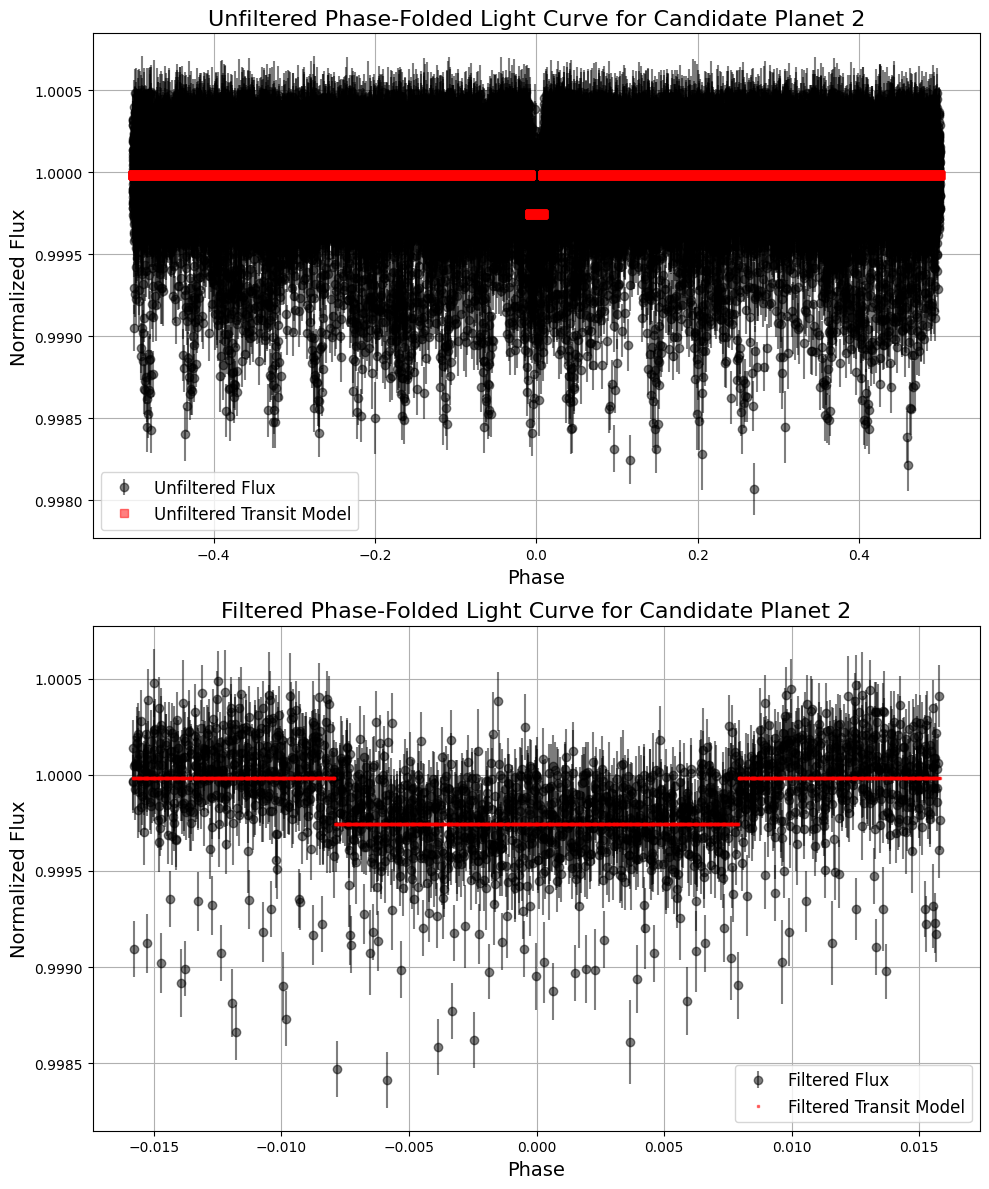

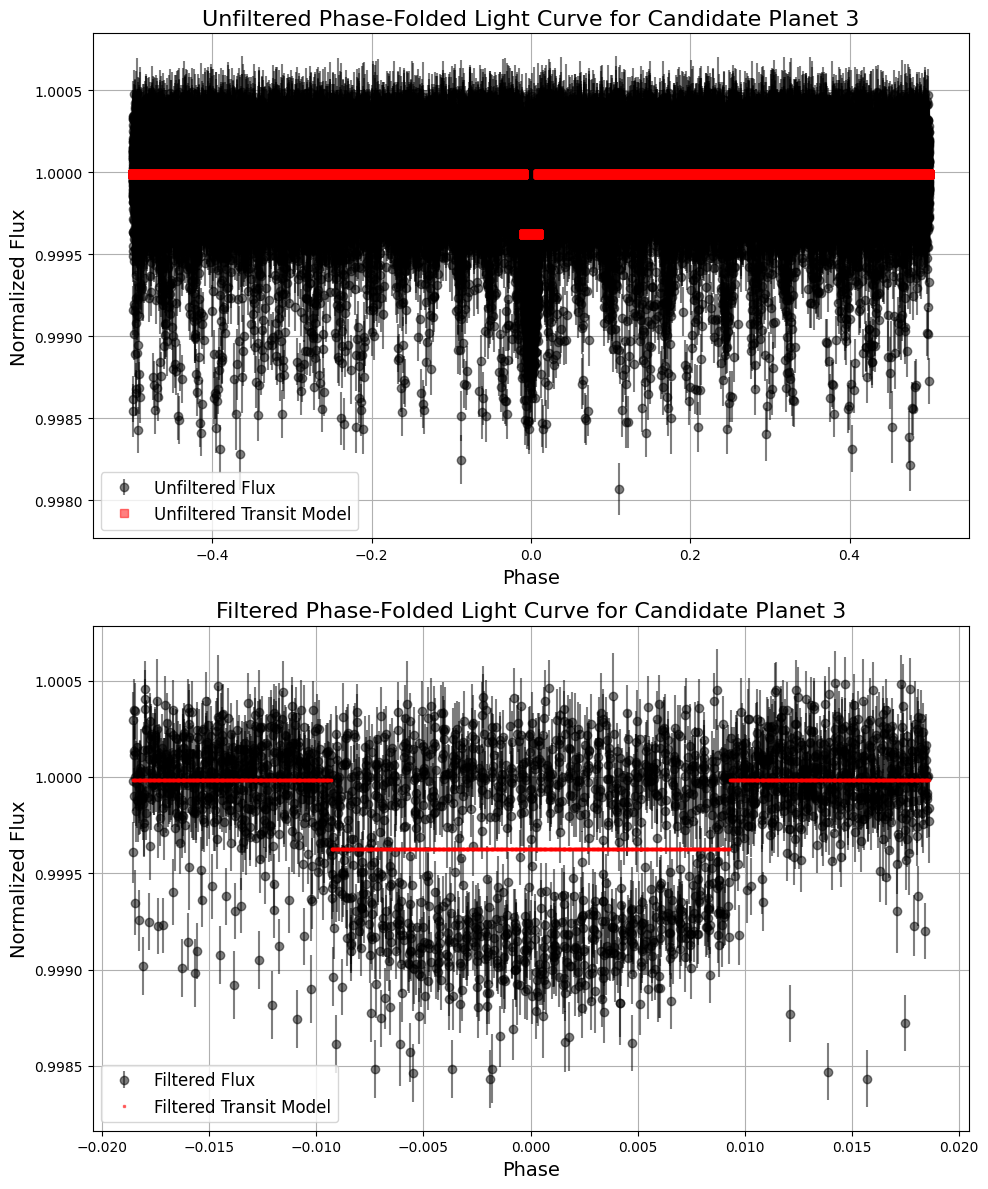

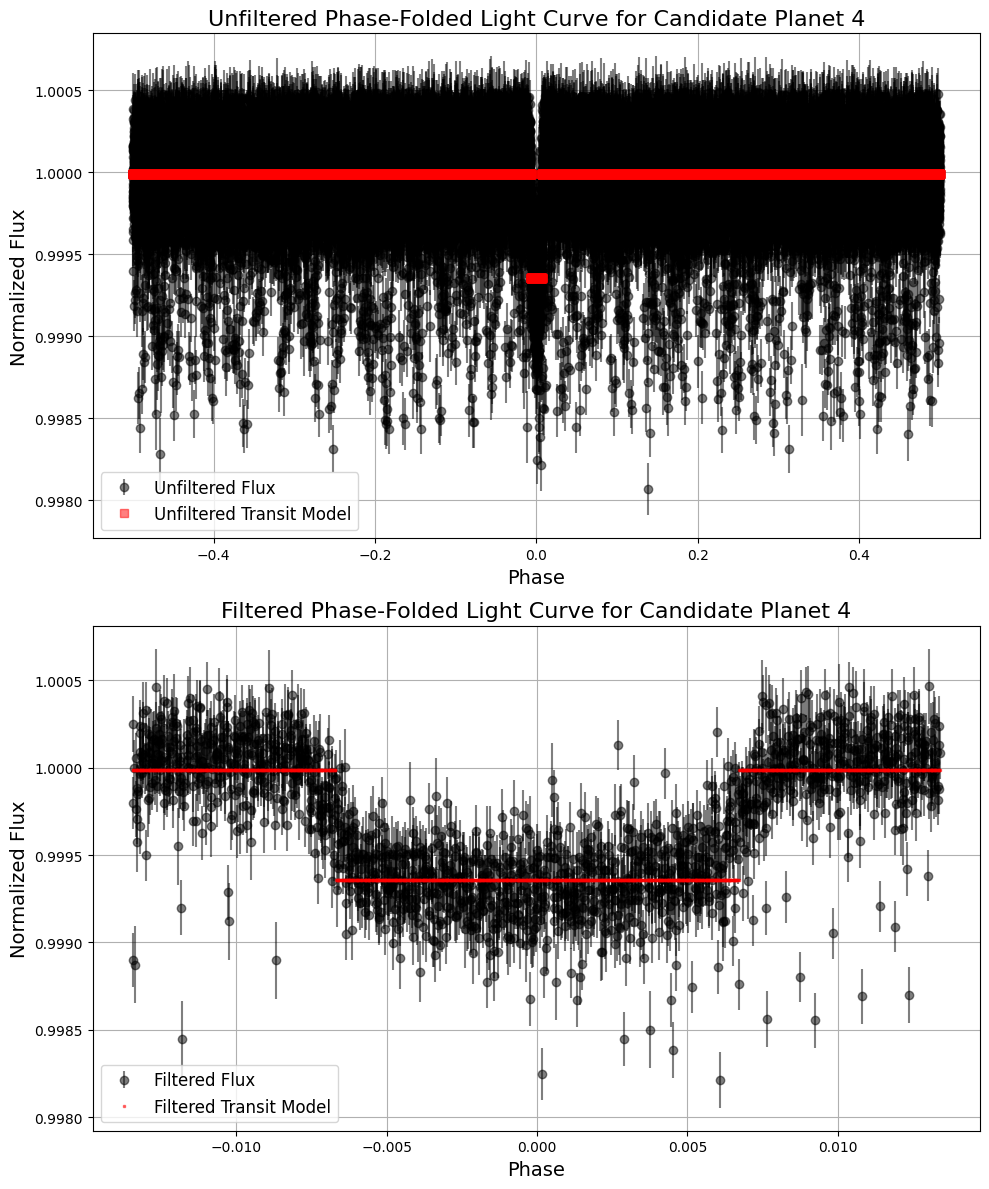


Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 8.11 days
  Refined Period = 7.56 days
  Transit Depth  = 2.66e-04
  Transit Duration = 0.21 days
  Power = 2614.79
----------------------------------------
Best Transit Candidate: Period = 7.56 days, Depth = 2.66e-04
Estimated Planet Radius: 0.017 Solar Radii
Estimated Planet Radius: 1.862 Earth Radii
Estimated Planet Radius: 0.170 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 9.43 days
  Refined Period = 10.30 days
  Transit Depth  = 2.39e-04
  Transit Duration = 0.16 days
  Power = 1229.19
----------------------------------------
Best Transit Candidate: Period = 10.30 days, Depth = 2.39e-04
Estimated Planet Radius: 0.016 Solar Radii
Estimated Planet Radius: 1.763 Earth Radii
Estimated Planet Radius:

In [12]:
peaks_of_lightcurve_different_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve_different,0.05, False)

results_list_different = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_different_filt,
      10000
)

results_list_different = courseworkb.remove_duplicate_periods(results_list_different,0.1,0.1, 0.1)

courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list_different )

courseworkb.summarize_results(results_list_different,stellar_data)